In [4]:
!pip install scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [6]:
df=pd.read_csv(url)

In [11]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [19]:
cdf=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


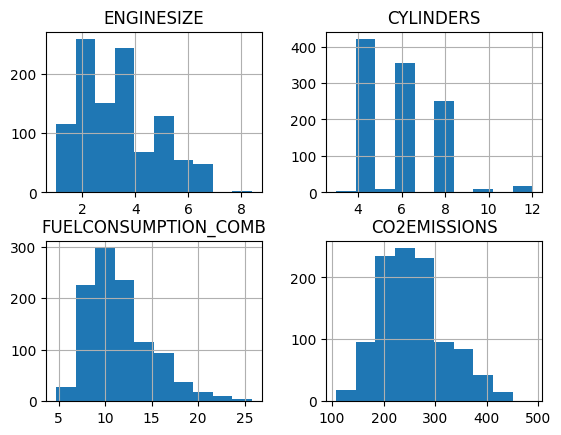

In [21]:
viz=cdf[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
viz.hist()
plt.show()

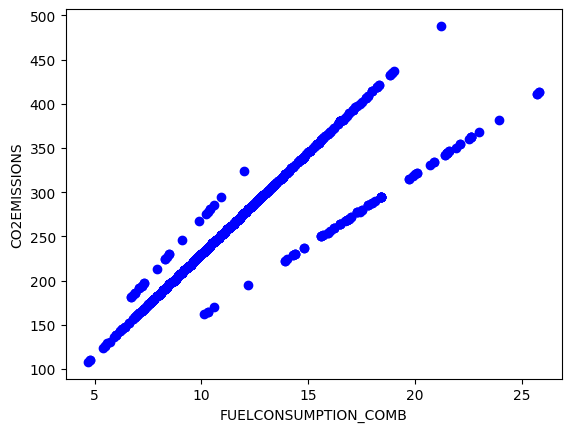

In [25]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

Therefore with these two observations we can consider that FUELCONSUMPTION_COMBINED can be the best independent variable which has a better linear relationship with the CO2EMISSIONS


In [71]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn import linear_model

In [75]:
regressor = linear_model.LinearRegression()

In [76]:
regressor.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [77]:
print(regressor.intercept_)

69.10302617988444


In [78]:
y_predicted = regressor.predict(X_test.reshape(-1,1))

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f"Mean absolute error : {mean_absolute_error(y_test, y_predicted):.4f}")
print(f"Mean squared error : {mean_squared_error(y_test, y_predicted):.4f}")
print(f"R2 Score : {r2_score(y_test, y_predicted):.4f}")

Mean absolute error : 20.4419
Mean squared error : 797.4346
R2 Score : 0.8071
